In [59]:
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2 as cv2
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset.csv')
df.head(10)
df.shape


FileNotFoundError: [Errno 2] File b'dataset.csv' does not exist: b'dataset.csv'

In [3]:
df

,id,class
0,3.jpg,1
1,4.jpg,2
2,5.jpg,2
3,8.jpg,1
4,9.jpg,1
5,11.jpg,2
6,15.jpg,2
7,18.jpg,1
8,19.jpg,1
9,21.jpg,2


In [4]:
images_train = [tf.keras.utils.normalize(cv2.imread('images/'+x,0)) for x in df['id'][0:2672]]
images_test = [tf.keras.utils.normalize(cv2.imread('images/'+x,0)) for x in df['id'][2672:]]

In [5]:
y_train = list(df['class'][0:2672])
for i,x in enumerate(y_train):
    if x==2:
        y_train[i]=0
y_test = list(df['class'][2672:])
for i,x in enumerate(y_test):
    if x==2:
        y_test[i]=0

images_train =  np.array(images_train).reshape(2672, 200, 200,1)
images_test = np.array(images_test).reshape(1780, 200, 200,1)


In [6]:
def show_train(i):
    plt.imshow(images_train[i].reshape(200,200),cmap='gray')
    plt.show()
    print(y_train[i])
def show_test(i):
    plt.imshow(images_test[i].reshape(200,200),cmap='gray')
    plt.show()

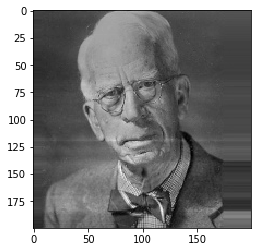

In [7]:
show_test(495)

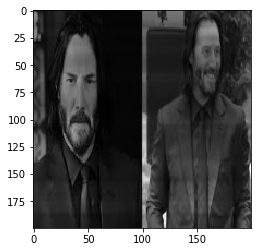

1


In [8]:
show_train(124)

In [9]:
%load_ext tensorboard
%tensorboard --logdir log

In [10]:
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout
model = tf.keras.Sequential()

# block 1
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200,1)))
model.add(MaxPooling2D((3, 3)))
model.add(Conv2D(64, (4, 4), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((4, 4)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation ='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation ='relu'))
model.add(Dropout(0.4))
model.add(Dense(2,activation = "sigmoid"))

W0712 23:11:19.119138 140054135613248 deprecation.py:506] From /home/alan/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [11]:
model.compile(optimizer = "adam" , loss = "sparse_categorical_crossentropy" , metrics = ["accuracy"])

In [40]:
model.fit(images_train,y_train,epochs = 8,batch_size=128,callbacks=[tf.keras.callbacks.TensorBoard('log',histogram_freq=1)])

Epoch 1/8
2672/2672 [==============================] - 38s 14ms/sample - loss: 0.6131 - acc: 0.6965
Epoch 2/8
2672/2672 [==============================] - 36s 13ms/sample - loss: 0.4652 - acc: 0.7489
Epoch 3/8
2672/2672 [==============================] - 43s 16ms/sample - loss: 0.3739 - acc: 0.8428
Epoch 4/8
2672/2672 [==============================] - 35s 13ms/sample - loss: 0.2840 - acc: 0.8918
Epoch 5/8
2672/2672 [==============================] - 35s 13ms/sample - loss: 0.2043 - acc: 0.9251
Epoch 6/8
2672/2672 [==============================] - 35s 13ms/sample - loss: 0.1516 - acc: 0.9446
Epoch 7/8
2672/2672 [==============================] - 35s 13ms/sample - loss: 0.1343 - acc: 0.9502
Epoch 8/8
2672/2672 [==============================] - 35s 13ms/sample - loss: 0.0907 - acc: 0.9716


In [13]:
score = model.evaluate(images_test, y_test, batch_size=128)
print(score)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

In [4]:
predictions = model.predict_classes(images_test)

NameError: name 'model' is not defined

In [83]:
#LOAD MODEL

from tensorflow.keras.models import model_from_json
json = open('model2.json','r')
model = json.read()
model = model_from_json(model)
model.load_weights('model2.h5')
print(model)

In [84]:

def predict(i):
    img = cv2.imread(i,0)
    plt.imshow(img, cmap='gray')
    plt.show()
    img = cv2.imread(i,0)
    img = cv2.resize(img,(200,200))
    img = tf.keras.utils.normalize(img)
    img = img.reshape(1,200,200,1)
    if model.predict_classes(img):
        print(True)
    else:
        print(False)

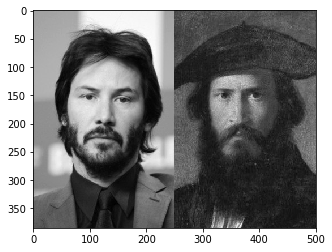

True


In [91]:
predict('img2.jpg')